# Assignment Overview


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.


##### 1. Metrics and Techniques
I used a lot of descriptives analysis techniques utilizing pandas .describe(), .info(), .value_counts() to assess the datasets. 
Accuracy: Checking if ranges fall into an acceptable range (i.e. dates not in the future, annual amounts paid for insurance, home market value

Completeness: Assessing the percentage of non-null values in each column or row.

Consistency: 2.020228% missing values in the CUST_START_DATE column.

Timeliness:

Validity:


-> analysing outlier, frequency, 

CUST START DATE NEEDS TO BE AFTER CUST ORIGINAL DATE

Handling of large numbers of same birth dates


 

##### 2. Issues with datasets 


##### 3. After cleaning the data improve 

In [28]:
# Loading libraries

# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# styling
plt.style.use("ggplot")
sns.set(style="whitegrid")

rcParams['figure.figsize'] = (12, 6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [161]:
def missing_pct(df):
    # Calculate percentage of missing for each column
    s_missing = df.isnull().sum() * 100 / df.shape[0]
    # Convert the series back to data frame
    df_missing = pd.DataFrame(s_missing).round(2)
    # Reset and rename the index
    df_missing = df_missing.reset_index().rename(
        columns={
            'index':'Column',
            0:'Missing_Percentage (%)'
        }
    )
    # Sort the data frame
    df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    return df_missing

In [205]:
# Loading datasets
customer_df = pd.read_csv("ABC_df_customer.csv")

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_89420/1552610.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df = pd.read_csv("ABC_df_customer.csv")


In [386]:
demographics_df = pd.read_csv("ABC_df_demographic.csv")

In [158]:
termination_df = pd.read_csv("ABC_df_termination.csv")

#### Customer DF Short Statistics

In [148]:
# customer_df short stats
customer_df.drop(columns='Unnamed: 0', inplace=True)

In [160]:
customer_df.head()

Unnamed: 0  INDIVIDUAL_ID    ADDRESS_ID CUST_ORIG_DATE DATE_OF_BIRTH  \
0           0   2.213000e+11  5.213000e+11     2018-12-09    1978-06-23   
1           1   2.213001e+11  5.213001e+11     2018-01-02    1950-05-30   
2           2   2.213007e+11  5.213002e+11     2009-09-23    1967-07-07   
3           3   2.213016e+11  5.213006e+11     2022-07-25    1969-05-25   
4           4   2.213016e+11  5.213006e+11     2006-10-11    1972-09-25   

  SOCIAL_SECURITY_NUMBER CUST_START_DATE  CURR_ANN_AMT_CAR  \
0            608-XX-7640      2018-12-09       1318.877997   
1            342-XX-6908      2018-01-02       1474.199182   
2            240-XX-9224      2009-09-23       1467.375112   
3            775-XX-6249      2022-07-25       1492.409561   
4            629-XX-7298      2006-10-11       1284.633494   

   CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE  
0           517.999317                 411  
1           558.417779                 414  
2           701.649310                 442  
3           401.517490                 463  
4           772.857222                 366

In [20]:
customer_df.shape

(2303124, 9)

In [162]:
missing_pct(customer_df)

Column  Missing_Percentage (%)
6         CUST_START_DATE                    3.96
0              Unnamed: 0                    0.00
1           INDIVIDUAL_ID                    0.00
2              ADDRESS_ID                    0.00
3          CUST_ORIG_DATE                    0.00
4           DATE_OF_BIRTH                    0.00
5  SOCIAL_SECURITY_NUMBER                    0.00
7        CURR_ANN_AMT_CAR                    0.00
8     CURR_ANN_AMT_HEALTH                    0.00
9      CURR_ANN_AMT_HOUSE                    0.00

In [155]:
customer_df.describe()

INDIVIDUAL_ID    ADDRESS_ID  CURR_ANN_AMT_CAR  CURR_ANN_AMT_HEALTH  \
count   2.303123e+06  2.303123e+06      2.303124e+06         2.303124e+06   
mean    2.213018e+11  5.213007e+11      1.431069e+03         5.725299e+02   
std     9.915268e+05  4.170653e+05      2.439311e+02         1.896686e+02   
min     2.213000e+11  5.213000e+11      2.869633e+02        -3.516244e+02   
25%     2.213009e+11  5.213003e+11      1.264830e+03         4.442061e+02   
50%     2.213018e+11  5.213007e+11      1.425758e+03         5.720247e+02   
75%     2.213027e+11  5.213010e+11      1.591793e+03         7.001292e+02   
max     2.213033e+11  5.213015e+11      2.769374e+03         1.617531e+03   

       CURR_ANN_AMT_HOUSE  
count        2.303124e+06  
mean         4.293221e+02  
std          7.606463e+01  
min          9.000000e+01  
25%          3.770000e+02  
50%          4.270000e+02  
75%          4.790000e+02  
max          8.870000e+02

#### Step 1: Identify and remove duplicates

###### customer_df

In [207]:
customer_df_step1 = customer_df

In [209]:
customer_df_step1 = customer_df_step1.drop_duplicates(subset="INDIVIDUAL_ID", keep=False)

In [211]:
customer_df_step1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257518 entries, 0 to 2280320
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              2257518 non-null  int64  
 1   INDIVIDUAL_ID           2257517 non-null  float64
 2   ADDRESS_ID              2257517 non-null  float64
 3   CUST_ORIG_DATE          2257518 non-null  object 
 4   DATE_OF_BIRTH           2257518 non-null  object 
 5   SOCIAL_SECURITY_NUMBER  2257518 non-null  object 
 6   CUST_START_DATE         2211911 non-null  object 
 7   CURR_ANN_AMT_CAR        2257518 non-null  float64
 8   CURR_ANN_AMT_HEALTH     2257518 non-null  float64
 9   CURR_ANN_AMT_HOUSE      2257518 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 189.5+ MB


In [212]:
customer_df_step1.duplicated().sum()

0

In [213]:
customer_df_step1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257518 entries, 0 to 2280320
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              2257518 non-null  int64  
 1   INDIVIDUAL_ID           2257517 non-null  float64
 2   ADDRESS_ID              2257517 non-null  float64
 3   CUST_ORIG_DATE          2257518 non-null  object 
 4   DATE_OF_BIRTH           2257518 non-null  object 
 5   SOCIAL_SECURITY_NUMBER  2257518 non-null  object 
 6   CUST_START_DATE         2211911 non-null  object 
 7   CURR_ANN_AMT_CAR        2257518 non-null  float64
 8   CURR_ANN_AMT_HEALTH     2257518 non-null  float64
 9   CURR_ANN_AMT_HOUSE      2257518 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 189.5+ MB


###### demographics_df

In [392]:
demographics_df_step1 = demographics_df.drop(columns='Unnamed: 0')

In [393]:
demographics_df_step1.shape

(2112579, 10)

In [394]:
# Format into datetime object
customer_df_step1['CUST_ORIG_DATE'] = pd.to_datetime(customer_df_step1['CUST_ORIG_DATE'])
customer_df_step1['CUST_START_DATE'] = pd.to_datetime(customer_df_step1['CUST_START_DATE'])
customer_df_step1['DATE_OF_BIRTH'] = pd.to_datetime(customer_df_step1['DATE_OF_BIRTH'])

##### terminated_df

In [305]:
termination_df_step1 = termination_df

In [306]:
termination_df_step1.head()

INDIVIDUAL_ID  SUSPD_DATE
0   2.213026e+11  2022-10-09
1   2.213028e+11  2022-04-24
2   2.213027e+11  2022-05-21
3   2.213002e+11  2022-04-27
4   2.213026e+11  2022-09-16

In [336]:
termination_df_step1['SUSPD_DATE'] = pd.to_datetime(termination_df_step1['SUSPD_DATE'])

In [307]:
termination_df_step1.describe()

INDIVIDUAL_ID
count   2.692590e+05
mean    2.213018e+11
std     9.890987e+05
min     2.213000e+11
25%     2.213009e+11
50%     2.213018e+11
75%     2.213027e+11
max     2.213033e+11

In [337]:
termination_df_step1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269259 entries, 0 to 269258
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   INDIVIDUAL_ID  269259 non-null  float64       
 1   SUSPD_DATE     266566 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.2 MB


In [338]:
# Dropping duplicates in the ID column, if there exist any
termination_df_step1 = termination_df_step1.drop_duplicates(subset="INDIVIDUAL_ID",keep=False)

In [339]:
termination_df_step1.head()

INDIVIDUAL_ID SUSPD_DATE
0   2.213026e+11 2022-10-09
1   2.213028e+11 2022-04-24
2   2.213027e+11 2022-05-21
3   2.213002e+11 2022-04-27
4   2.213026e+11 2022-09-16

#### Step 2:  Identify and deal with missing values in the data


##### customer_df

In [223]:
missing_pct(customer_df_step1)

Column  Missing_Percentage (%)
6         CUST_START_DATE                    2.02
0              Unnamed: 0                    0.00
1           INDIVIDUAL_ID                    0.00
2              ADDRESS_ID                    0.00
3          CUST_ORIG_DATE                    0.00
4           DATE_OF_BIRTH                    0.00
5  SOCIAL_SECURITY_NUMBER                    0.00
7        CURR_ANN_AMT_CAR                    0.00
8     CURR_ANN_AMT_HEALTH                    0.00
9      CURR_ANN_AMT_HOUSE                    0.00

CUST_START_DATE has 2,02 % missing values, can be filled with origin date

In [224]:
customer_df_step2 = customer_df_step1

In [225]:
customer_df_step2['CUST_START_DATE'].fillna(customer_df_step2['CUST_ORIG_DATE'], inplace=True)

In [226]:
missing_pct(customer_df_step2)

Column  Missing_Percentage (%)
0              Unnamed: 0                     0.0
1           INDIVIDUAL_ID                     0.0
2              ADDRESS_ID                     0.0
3          CUST_ORIG_DATE                     0.0
4           DATE_OF_BIRTH                     0.0
5  SOCIAL_SECURITY_NUMBER                     0.0
6         CUST_START_DATE                     0.0
7        CURR_ANN_AMT_CAR                     0.0
8     CURR_ANN_AMT_HEALTH                     0.0
9      CURR_ANN_AMT_HOUSE                     0.0

customer_df missing values cleaned

In [227]:
customer_df_step2.describe()

Unnamed: 0  INDIVIDUAL_ID    ADDRESS_ID  CURR_ANN_AMT_CAR  \
count  2.257518e+06   2.257517e+06  2.257517e+06      2.257518e+06   
mean   1.140204e+06   2.213018e+11  5.213007e+11      1.431062e+03   
std    6.582753e+05   9.915715e+05  4.171218e+05      2.439508e+02   
min    0.000000e+00   2.213000e+11  5.213000e+11      2.869633e+02   
25%    5.701182e+05   2.213009e+11  5.213003e+11      1.264777e+03   
50%    1.140216e+06   2.213018e+11  5.213007e+11      1.425739e+03   
75%    1.710286e+06   2.213027e+11  5.213010e+11      1.591797e+03   
max    2.280320e+06   2.213033e+11  5.213015e+11      2.769374e+03   

       CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE  
count         2.257518e+06        2.257518e+06  
mean          5.725250e+02        4.293214e+02  
std           1.896649e+02        7.607093e+01  
min          -3.516244e+02        9.000000e+01  
25%           4.441961e+02        3.770000e+02  
50%           5.720113e+02        4.270000e+02  
75%           7.001139e+02        4.790000e+02  
max           1.617531e+03        8.870000e+02

##### demographics_df

In [396]:
demographics_df_step2 = demographics_df_step1

In [397]:
missing_pct(demographics_df_step1)

Column  Missing_Percentage (%)
4       MARITAL_STATUS                   20.43
5    HOME_MARKET_VALUE                    9.00
0        INDIVIDUAL_ID                    0.00
1               INCOME                    0.00
2         HAS_CHILDREN                    0.00
3  LENGTH_OF_RESIDENCE                    0.00
6           HOME_OWNER                    0.00
7       COLLEGE_DEGREE                    0.00
8          GOOD_CREDIT                    0.00
9     ADVANCED_STUDIES                    0.00

Maritial status has 20.45% of missing values. 
Create dummy variable out of Maritial Status column.

In [398]:
demographics_df_step2 = pd.get_dummies(demographics_df_step1, columns=["MARITAL_STATUS"])

In [370]:
missing_pct(demographics_df_step2)

Column  Missing_Percentage (%)
4        HOME_MARKET_VALUE                     9.0
0            INDIVIDUAL_ID                     0.0
1                   INCOME                     0.0
2             HAS_CHILDREN                     0.0
3      LENGTH_OF_RESIDENCE                     0.0
5               HOME_OWNER                     0.0
6           COLLEGE_DEGREE                     0.0
7              GOOD_CREDIT                     0.0
8         ADVANCED_STUDIES                     0.0
9   MARITAL_STATUS_Married                     0.0
10   MARITAL_STATUS_Single                     0.0

Investigate Home Market Values

In [399]:
demographics_df_step2[pd.isnull(demographics_df_step2['HOME_MARKET_VALUE'])]

INDIVIDUAL_ID      INCOME  HAS_CHILDREN  LENGTH_OF_RESIDENCE  \
1         2.213032e+11   63750.000           0.0                  0.0   
4         2.213032e+11  187500.000           0.0                  0.0   
16        2.213015e+11  105000.000           0.0                  0.0   
22        2.213008e+11   71250.000           0.0                  0.0   
28        2.213017e+11   41250.000           0.0                  0.0   
...                ...         ...           ...                  ...   
2112516   2.213009e+11  131250.000           1.0                  0.0   
2112542   2.213017e+11  120558.264           0.0                  0.0   
2112548   2.213025e+11  131250.000           0.0                  0.0   
2112556   2.213032e+11   48750.000           1.0                  0.0   
2112557   2.213033e+11   78750.000           1.0                  2.0   

        HOME_MARKET_VALUE  HOME_OWNER  COLLEGE_DEGREE  GOOD_CREDIT  \
1                     NaN           0               0            0   
4                     NaN           0               0            1   
16                    NaN           0               0            1   
22                    NaN           0               0            1   
28                    NaN           0               0            1   
...                   ...         ...             ...          ...   
2112516               NaN           0               0            1   
2112542               NaN           0               1            1   
2112548               NaN           0               0            0   
2112556               NaN           0               0            1   
2112557               NaN           1               0            1   

        ADVANCED_STUDIES  MARITAL_STATUS_Married  MARITAL_STATUS_Single  
1                      N                       0                      1  
4                      Y                       0                      0  
16                     N                       0                      0  
22                     N                       0                      0  
28                     N                       0                      1  
...                  ...                     ...                    ...  
2112516                Y                       1                      0  
2112542                N                       0                      0  
2112548                Y                       0                      0  
2112556                N                       0                      1  
2112557                N                       0                      1  

[190205 rows x 11 columns]

Home Market Value is 0 when customer does not have a home. Create Dummy Variable out of it.

In [400]:
demographics_df_step2 = pd.get_dummies(demographics_df_step2, columns=["HOME_MARKET_VALUE"], dummy_na= True)

In [401]:
missing_pct(demographics_df_step2)

Column  Missing_Percentage (%)
0                       INDIVIDUAL_ID                     0.0
1                              INCOME                     0.0
28  HOME_MARKET_VALUE_750000 - 999999                     0.0
27    HOME_MARKET_VALUE_75000 - 99999                     0.0
26  HOME_MARKET_VALUE_500000 - 749999                     0.0
25    HOME_MARKET_VALUE_50000 - 74999                     0.0
24  HOME_MARKET_VALUE_450000 - 499999                     0.0
23  HOME_MARKET_VALUE_400000 - 449999                     0.0
22  HOME_MARKET_VALUE_350000 - 399999                     0.0
21  HOME_MARKET_VALUE_300000 - 349999                     0.0
20  HOME_MARKET_VALUE_275000 - 299999                     0.0
19  HOME_MARKET_VALUE_250000 - 274999                     0.0
18    HOME_MARKET_VALUE_25000 - 49999                     0.0
17  HOME_MARKET_VALUE_225000 - 249999                     0.0
16  HOME_MARKET_VALUE_200000 - 224999                     0.0
15  HOME_MARKET_VALUE_175000 - 199999                     0.0
14  HOME_MARKET_VALUE_150000 - 174999                     0.0
13  HOME_MARKET_VALUE_125000 - 149999                     0.0
12     HOME_MARKET_VALUE_1000000 Plus                     0.0
11  HOME_MARKET_VALUE_100000 - 124999                     0.0
10     HOME_MARKET_VALUE_1000 - 24999                     0.0
9               MARITAL_STATUS_Single                     0.0
8              MARITAL_STATUS_Married                     0.0
7                    ADVANCED_STUDIES                     0.0
6                         GOOD_CREDIT                     0.0
5                      COLLEGE_DEGREE                     0.0
4                          HOME_OWNER                     0.0
3                 LENGTH_OF_RESIDENCE                     0.0
2                        HAS_CHILDREN                     0.0
29              HOME_MARKET_VALUE_nan                     0.0

Demographics Dataset cleaned

In [402]:
demographics_df_step2.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 30 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   INDIVIDUAL_ID                      2112579 non-null  float64
 1   INCOME                             2112579 non-null  float64
 2   HAS_CHILDREN                       2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE                2112579 non-null  float64
 4   HOME_OWNER                         2112579 non-null  int64  
 5   COLLEGE_DEGREE                     2112579 non-null  int64  
 6   GOOD_CREDIT                        2112579 non-null  int64  
 7   ADVANCED_STUDIES                   2112579 non-null  object 
 8   MARITAL_STATUS_Married             2112579 non-null  uint8  
 9   MARITAL_STATUS_Single              2112579 non-null  uint8  
 10  HOME_MARKET_VALUE_1000 - 24999     2112579 non-null  uint8  
 11  HOME_MARKET_VALUE_100000

##### terminated_df

In [340]:
termination_df_step2 = termination_df_step1

In [341]:
missing_pct(termination_df_step1)

Column  Missing_Percentage (%)
1     SUSPD_DATE                     1.0
0  INDIVIDUAL_ID                     0.0

Remove 1% of supd date values

In [342]:
# Drop missing values (low amount of missing values, so can be dropped)
termination_df_step2 = termination_df_step2.dropna()

In [343]:
missing_pct(termination_df_step2)

Column  Missing_Percentage (%)
0  INDIVIDUAL_ID                     0.0
1     SUSPD_DATE                     0.0

#### Step 3: Address outliers by either removing or transforming them

##### customer_df

In [260]:
customer_df_step3 = customer_df_step2

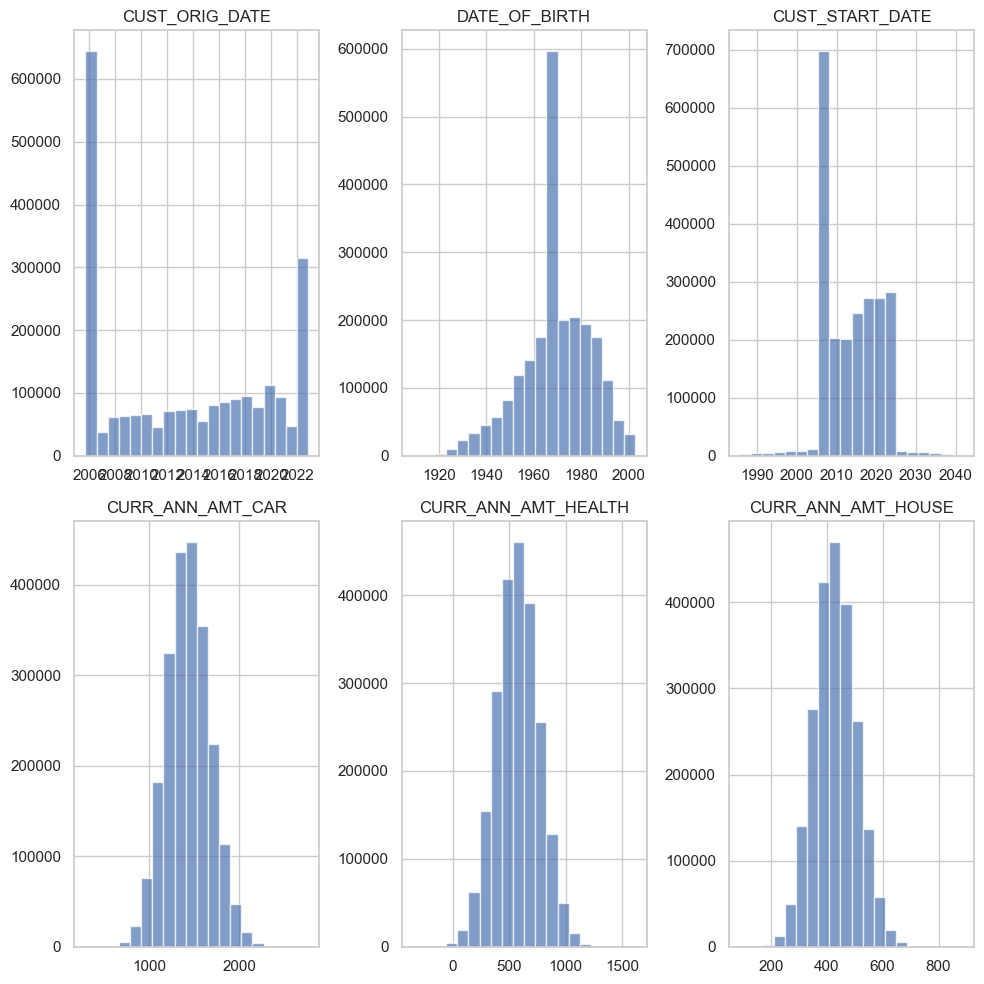

In [261]:
# Select columns you want to plot
columns_to_plot = ['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE', 'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE' ]

# Determine number of rows/columns for the subplot grid
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten() if n_rows > 1 else [axs]

# Plot histograms for selected columns
for ax, column in zip(axs, columns_to_plot):
    ax.hist(customer_df_step2[column], bins=20, alpha=0.7)
    ax.set_title(column)

# Hide any unused subplot areas
for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

Remove outliers for the dates

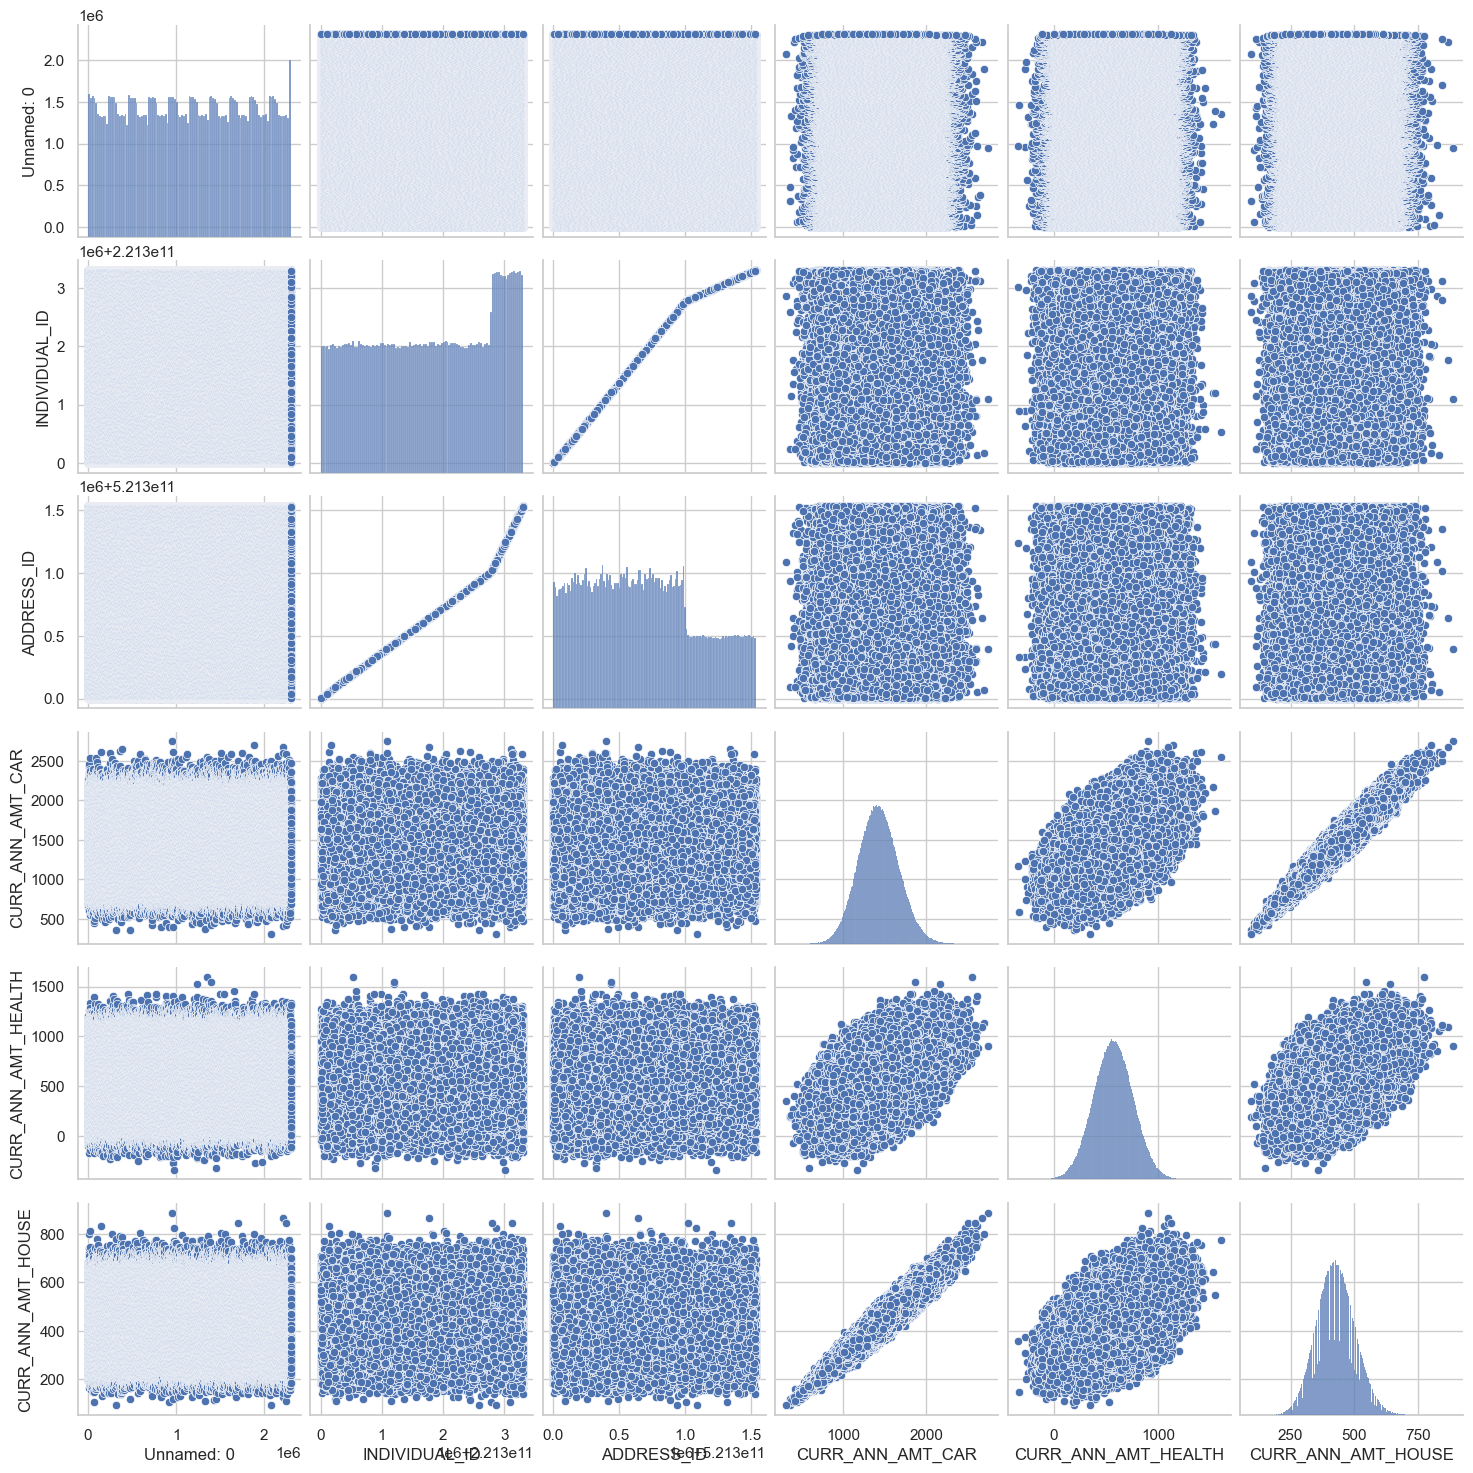

In [63]:
sns.pairplot(customer_df)

Based on this graphic: Remove outliers in Original, Start & Birth Dates

In [262]:
customer_df_step3['CUST_START_DATE'].value_counts()

2005-09-11    547197
2022-09-13     40683
2019-08-16     39686
2022-06-24     21241
2014-02-15     20456
               ...  
2033-01-28         1
1997-01-12         1
1997-01-18         1
2034-12-17         1
2029-01-22         1
Name: CUST_START_DATE, Length: 18275, dtype: int64

In [267]:
# removing outliers
customer_df_step3 = customer_df_step3[customer_df_step3['CUST_START_DATE'] != "2005-09-11"]

In [273]:
customer_df_step3 = customer_df_step3[customer_df_step3['CUST_ORIG_DATE'] != "2005-09-11"]
#customer_df_step3 = customer_df_step3[customer_df_step3['CUST_ORIG_DATE'] != "2005-09-11"]

In [268]:
customer_df_step3 = customer_df_step3[customer_df_step3['DATE_OF_BIRTH'] != "1967-07-07"]

In [269]:
customer_df_step3['CUST_START_DATE'].value_counts()

2022-09-13    3716
2019-08-16    3268
2022-06-24    2725
2022-09-07    2051
2022-07-29    1840
              ... 
2041-08-10       1
2033-01-30       1
2032-11-09       1
2024-06-10       1
2029-01-22       1
Name: CUST_START_DATE, Length: 18273, dtype: int64

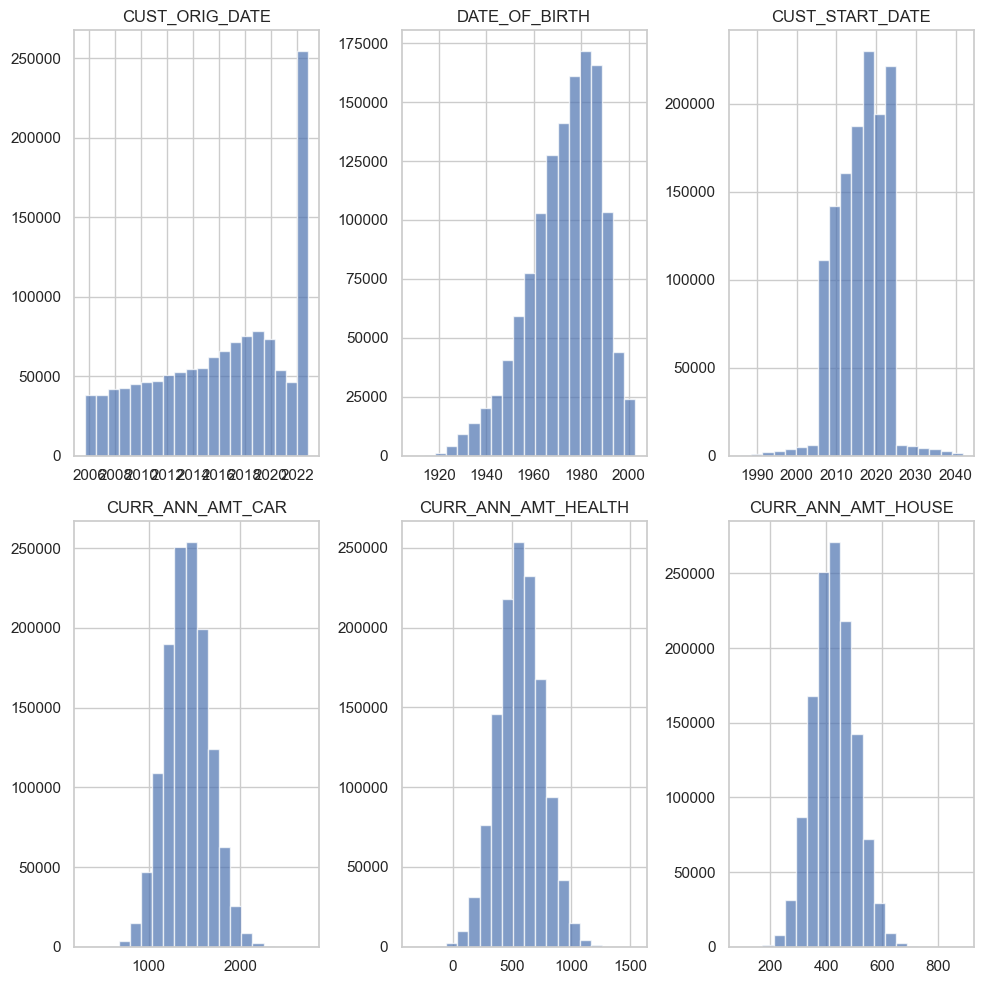

In [271]:
# Select columns you want to plot
columns_to_plot = ['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE', 'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE' ]

# Determine number of rows/columns for the subplot grid
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten() if n_rows > 1 else [axs]

# Plot histograms for selected columns
for ax, column in zip(axs, columns_to_plot):
    ax.hist(customer_df_step3[column], bins=20, alpha=0.7)
    ax.set_title(column)

# Hide any unused subplot areas
for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Identify and remove outliers in "CURR_ANN_AMT_CAR" column.
Q1 = customer_df['CURR_ANN_AMT_CAR'].quantile(0.25)
Q3 = customer_df['CURR_ANN_AMT_CAR'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers using the interquartile range (IQR) method
customer_df = customer_df[(customer_df['CURR_ANN_AMT_CAR'] >= Q1 - 1.5 * IQR) & (customer_df['CURR_ANN_AMT_CAR'] <= Q3 + 1.5 * IQR)]

In [12]:
customer_df.describe()

INDIVIDUAL_ID    ADDRESS_ID  CURR_ANN_AMT_CAR  CURR_ANN_AMT_HEALTH  \
count   2.239252e+06  2.239252e+06      2.239253e+06         2.239253e+06   
mean    2.213018e+11  5.213007e+11      1.428732e+03         5.715819e+02   
std     9.916801e+05  4.171920e+05      2.356442e+02         1.879740e+02   
min     2.213000e+11  5.213000e+11      7.742776e+02        -3.516244e+02   
25%     2.213009e+11  5.213003e+11      1.265144e+03         4.442697e+02   
50%     2.213018e+11  5.213007e+11      1.424818e+03         5.713269e+02   
75%     2.213027e+11  5.213010e+11      1.589013e+03         6.984898e+02   
max     2.213033e+11  5.213015e+11      2.082324e+03         1.544589e+03   

       CURR_ANN_AMT_HOUSE  
count        2.239253e+06  
mean         4.286220e+02  
std          7.367208e+01  
min          1.800000e+02  
25%          3.770000e+02  
50%          4.270000e+02  
75%          4.780000e+02  
max          7.030000e+02

##### demographics_df

In [403]:
demographics_df_step3 = demographics_df_step2

In [404]:
demographics_df_step3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 30 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   INDIVIDUAL_ID                      2112579 non-null  float64
 1   INCOME                             2112579 non-null  float64
 2   HAS_CHILDREN                       2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE                2112579 non-null  float64
 4   HOME_OWNER                         2112579 non-null  int64  
 5   COLLEGE_DEGREE                     2112579 non-null  int64  
 6   GOOD_CREDIT                        2112579 non-null  int64  
 7   ADVANCED_STUDIES                   2112579 non-null  object 
 8   MARITAL_STATUS_Married             2112579 non-null  uint8  
 9   MARITAL_STATUS_Single              2112579 non-null  uint8  
 10  HOME_MARKET_VALUE_1000 - 24999     2112579 non-null  uint8  
 11  HOME_MARKET_VALUE_100000

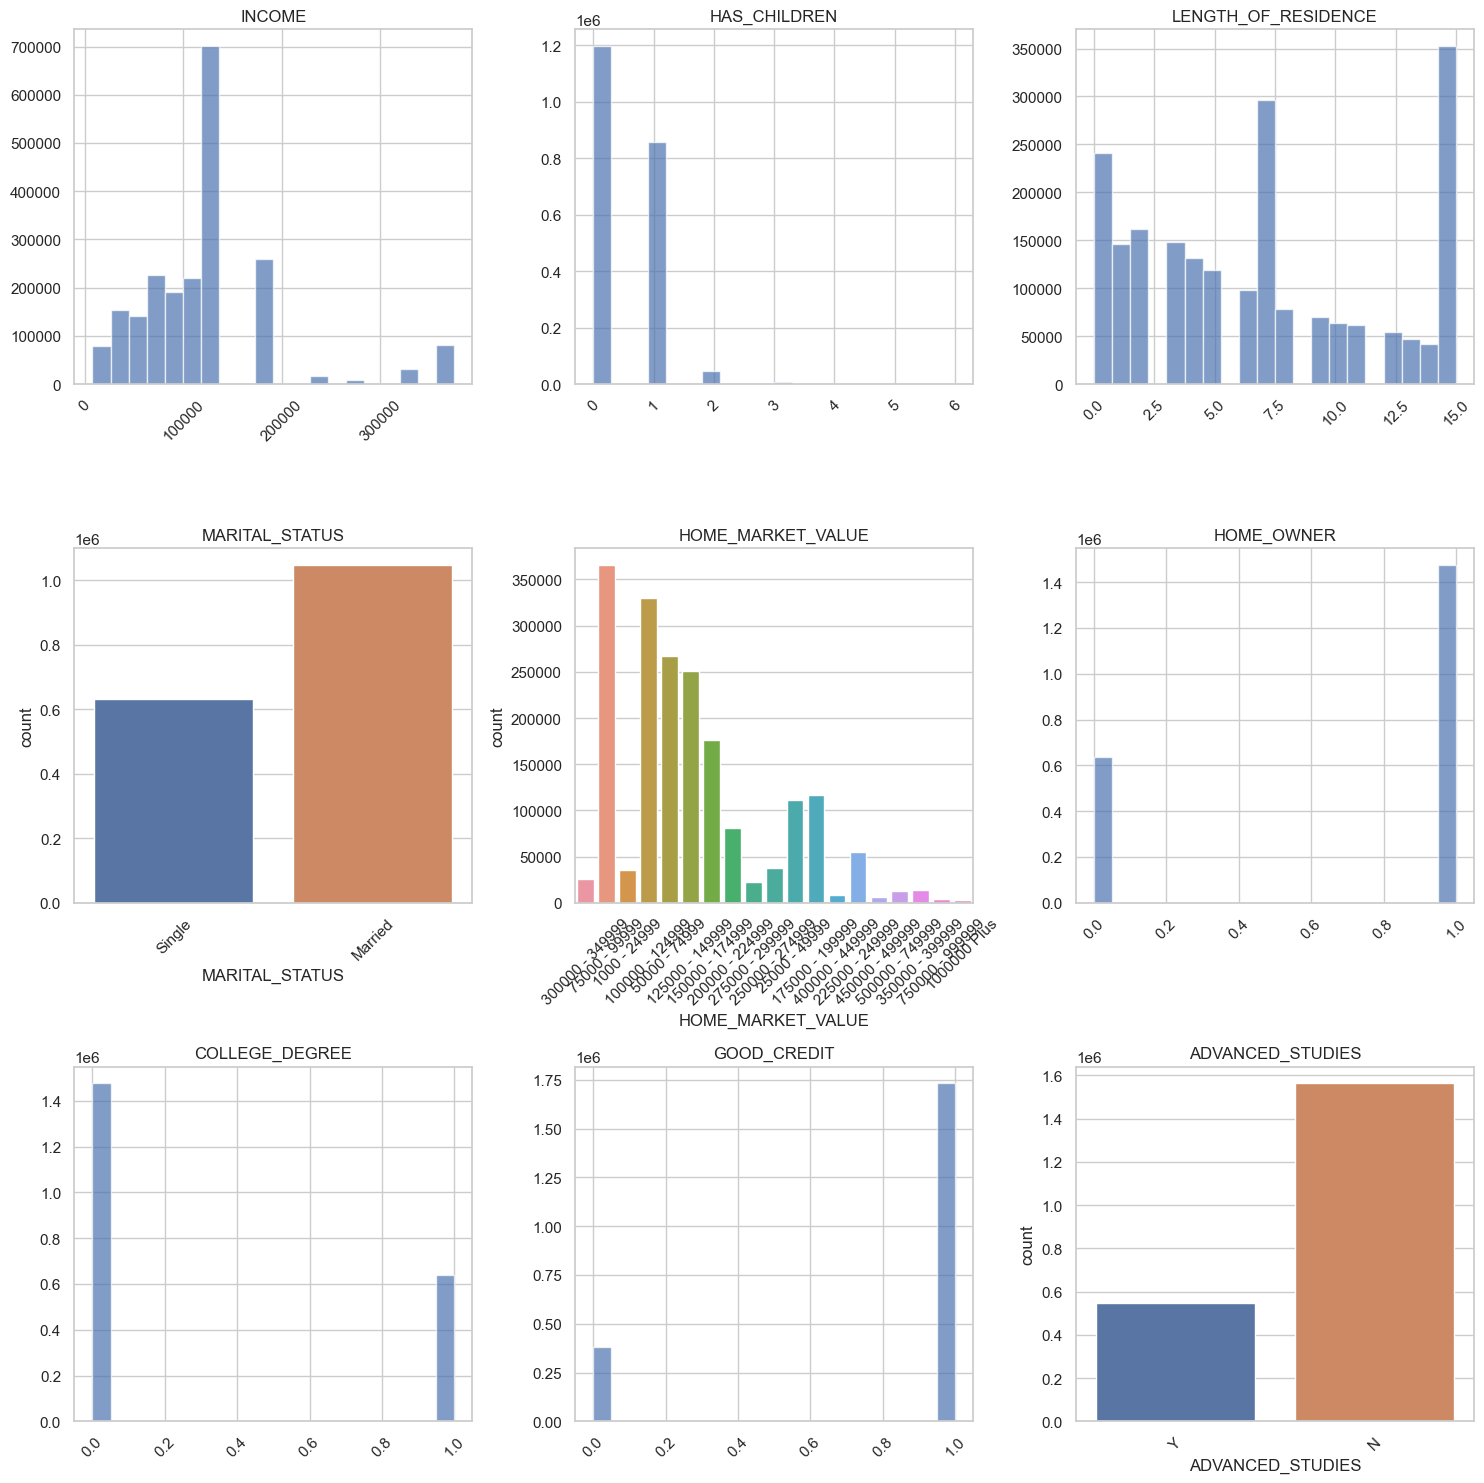

In [277]:
columns_to_plot = ['INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS', 'HOME_MARKET_VALUE', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES']

# Determine number of rows/columns for the subplot grid
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Iterate over each column and plot accordingly
for i, column in enumerate(columns_to_plot):
    # Check if the column is numeric or categorical
    if demographics_df_step1[column].dtype == 'object' or demographics_df_step1[column].dtype.name == 'category':
        # For categorical data, use count plot
        sns.countplot(data=demographics_df_step1, x=column, ax=axs[i])
    else:
        # For numeric data, use histogram
        axs[i].hist(demographics_df_step1[column], bins=20, alpha=0.7)
    axs[i].set_title(column)
    axs[i].tick_params(axis='x', rotation=45)

# Hide any unused subplot areas
for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

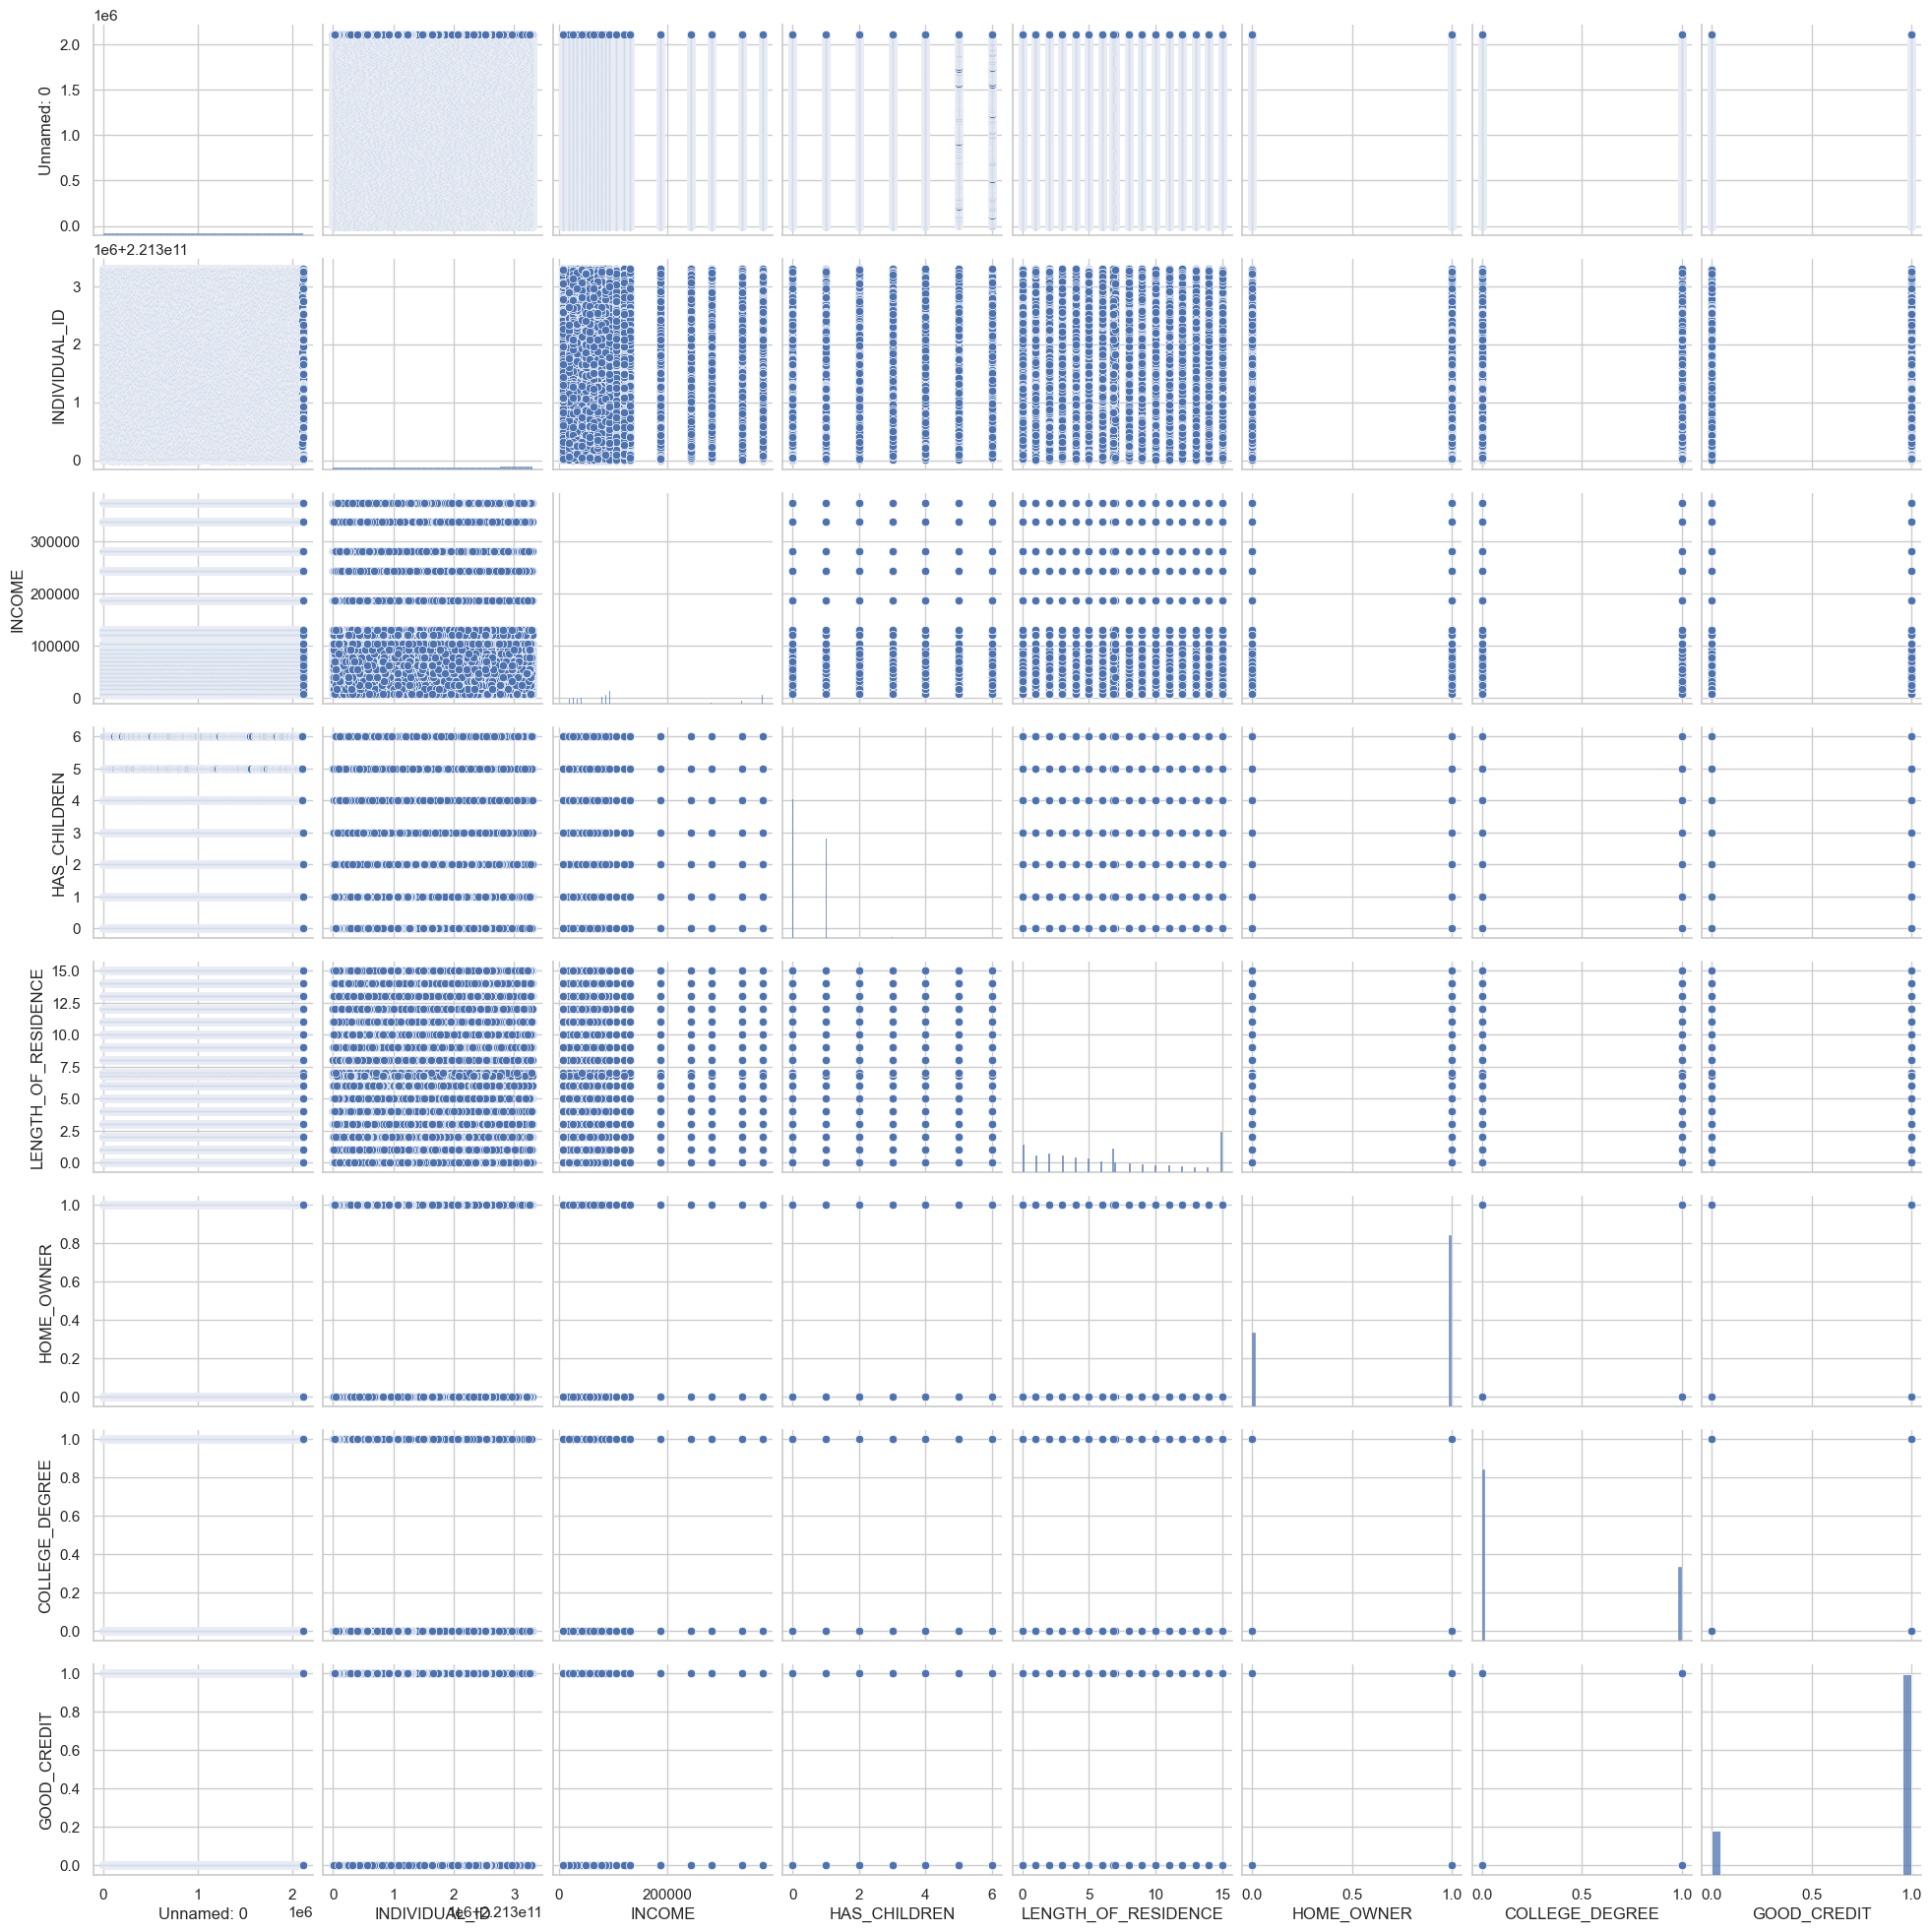

In [62]:
sns.pairplot(demographics_df)

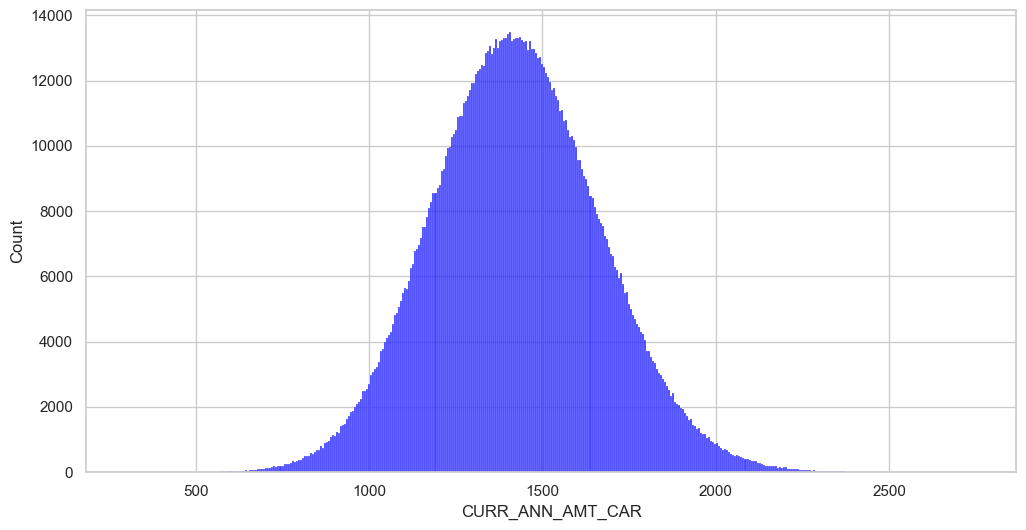

In [60]:
sns.histplot(customer_df["CURR_ANN_AMT_CAR"], color="blue")
plt.show()

In [384]:
demographics_df_step3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 30 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   INDIVIDUAL_ID                      2112579 non-null  float64
 1   INCOME                             2112579 non-null  float64
 2   HAS_CHILDREN                       2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE                2112579 non-null  float64
 4   HOME_OWNER                         2112579 non-null  int64  
 5   COLLEGE_DEGREE                     2112579 non-null  int64  
 6   GOOD_CREDIT                        2112579 non-null  int64  
 7   ADVANCED_STUDIES                   0 non-null        float64
 8   MARITAL_STATUS_Married             2112579 non-null  uint8  
 9   MARITAL_STATUS_Single              2112579 non-null  uint8  
 10  HOME_MARKET_VALUE_1000 - 24999     2112579 non-null  uint8  
 11  HOME_MARKET_VALUE_100000

##### termination_df

In [345]:
termination_df_step3 = termination_df_step2

In [346]:
sns.histplot(termination_df_step2['SUSPD_DATE'])
plt.show()

In [347]:
termination_df_step2['SUSPD_DATE'].value_counts()

2022-03-17    938
2022-08-14    936
2022-09-20    923
2021-12-10    923
2022-08-23    920
             ... 
2026-05-24      1
2025-05-15      1
2025-02-11      1
2023-02-18      1
2026-10-30      1
Name: SUSPD_DATE, Length: 2086, dtype: int64

#### Step 4: Remove or correct irrelevant data

##### customer_df

In [280]:
customer_df_step4 = customer_df_step3

##### demographcis_df

In [405]:
demographics_df_step4 = demographics_df_step3

##### termination_df

In [351]:
termination_df_step4 = termination_df_step3

#### Step 5: Detect and deal with any invalid or inconsistent data

Remove birth dates

remove length residens

##### customer_df

###### Annual amounts paid values above zero

In [323]:
customer_df_step5 = customer_df_step4

In [324]:
# Insurance amount needs to be above zero
customer_df_step5 = customer_df_step5[customer_df_step5['CURR_ANN_AMT_HEALTH'] > 0 ]
customer_df_step5 = customer_df_step5[customer_df_step5['CURR_ANN_AMT_CAR'] > 0 ]
customer_df_step5 = customer_df_step5[customer_df_step5['CURR_ANN_AMT_HOUSE'] > 0 ]

###### start date after original join date

In [325]:
# Policy start date has to be dated after the customer joined as a customer
customer_df_step5 = customer_df_step5[customer_df_step5["CUST_START_DATE"] >= customer_df_step5["CUST_ORIG_DATE"]]

In [326]:
# Policy start date has to be lower than year after the last customer joined as a customer
customer_df_step5 = customer_df_step5[customer_df_step5['CUST_START_DATE'] <= "2023-11-12"]

In [327]:
customer_df_step5['CUST_ORIG_DATE'].value_counts()

2022-09-13    3717
2019-08-16    3284
2022-06-24    2725
2022-07-29    1838
2022-08-02    1816
              ... 
2008-08-10       1
2015-04-01       1
2009-08-05       1
2013-11-14       1
2014-01-22       1
Name: CUST_ORIG_DATE, Length: 5250, dtype: int64

In [290]:
plt.figure(figsize=(14, 6))

boxplot_data = customer_df_step4
# First subplot
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.boxplot(data=boxplot_data, x='CURR_ANN_AMT_HEALTH')
plt.title('Boxplot of CURR_ANN_AMT_HEALTH')

# Second subplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.histplot(data=boxplot_data, x='CURR_ANN_AMT_CAR', bins=50)
plt.title('Histogram of CURR_ANN_AMT_CAR')

# Show the plots
plt.tight_layout()  # Adjust the subplots to fit in to the figure area.
plt.show()

##### demographics_df

###### Advanced Studies -> 0/1

In [406]:
demographics_df_step5 = demographics_df_step4

In [407]:
demographics_df_step4.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 30 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   INDIVIDUAL_ID                      2112579 non-null  float64
 1   INCOME                             2112579 non-null  float64
 2   HAS_CHILDREN                       2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE                2112579 non-null  float64
 4   HOME_OWNER                         2112579 non-null  int64  
 5   COLLEGE_DEGREE                     2112579 non-null  int64  
 6   GOOD_CREDIT                        2112579 non-null  int64  
 7   ADVANCED_STUDIES                   2112579 non-null  object 
 8   MARITAL_STATUS_Married             2112579 non-null  uint8  
 9   MARITAL_STATUS_Single              2112579 non-null  uint8  
 10  HOME_MARKET_VALUE_1000 - 24999     2112579 non-null  uint8  
 11  HOME_MARKET_VALUE_100000

In [408]:
demographics_df_step5.head()

INDIVIDUAL_ID      INCOME  HAS_CHILDREN  LENGTH_OF_RESIDENCE  HOME_OWNER  \
0   2.213028e+11  187500.000           1.0                  8.0           1   
1   2.213032e+11   63750.000           0.0                  0.0           0   
2   2.213032e+11   41250.000           0.0                 15.0           1   
3   2.213032e+11  120558.264           0.0                  0.0           1   
4   2.213032e+11  187500.000           0.0                  0.0           0   

   COLLEGE_DEGREE  GOOD_CREDIT ADVANCED_STUDIES  MARITAL_STATUS_Married  \
0               1            1                Y                       0   
1               0            0                N                       0   
2               0            1                N                       1   
3               0            0                N                       0   
4               0            1                Y                       0   

   MARITAL_STATUS_Single  ...  HOME_MARKET_VALUE_275000 - 299999  \
0                      1  ...                                  0   
1                      1  ...                                  0   
2                      0  ...                                  0   
3                      0  ...                                  0   
4                      0  ...                                  0   

   HOME_MARKET_VALUE_300000 - 349999  HOME_MARKET_VALUE_350000 - 399999  \
0                                  1                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   HOME_MARKET_VALUE_400000 - 449999  HOME_MARKET_VALUE_450000 - 499999  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   HOME_MARKET_VALUE_50000 - 74999  HOME_MARKET_VALUE_500000 - 749999  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   HOME_MARKET_VALUE_75000 - 99999  HOME_MARKET_VALUE_750000 - 999999  \
0                                0                                  0   
1                                0                                  0   
2                                1                                  0   
3                                0                                  0   
4                                0                                  0   

   HOME_MARKET_VALUE_nan  
0                      0  
1                      1  
2                      0  
3                      0  
4                      1  

[5 rows x 30 columns]

In [409]:
demographics_df_step5['ADVANCED_STUDIES'] = demographics_df_step5['ADVANCED_STUDIES'].replace({'Y': 1, 'N': 0})

In [410]:
demographics_df_step5

INDIVIDUAL_ID      INCOME  HAS_CHILDREN  LENGTH_OF_RESIDENCE  \
0         2.213028e+11  187500.000           1.0                  8.0   
1         2.213032e+11   63750.000           0.0                  0.0   
2         2.213032e+11   41250.000           0.0                 15.0   
3         2.213032e+11  120558.264           0.0                  0.0   
4         2.213032e+11  187500.000           0.0                  0.0   
...                ...         ...           ...                  ...   
2112574   2.213006e+11  131250.000           1.0                 12.0   
2112575   2.213006e+11   56250.000           1.0                  5.0   
2112576   2.213006e+11  187500.000           0.0                 13.0   
2112577   2.213006e+11  187500.000           2.0                 12.0   
2112578   2.213006e+11   63750.000           1.0                  4.0   

         HOME_OWNER  COLLEGE_DEGREE  GOOD_CREDIT  ADVANCED_STUDIES  \
0                 1               1            1                 1   
1                 0               0            0                 0   
2                 1               0            1                 0   
3                 1               0            0                 0   
4                 0               0            1                 1   
...             ...             ...          ...               ...   
2112574           1               0            1                 0   
2112575           0               0            1                 0   
2112576           1               1            1                 0   
2112577           1               0            1                 1   
2112578           1               0            0                 0   

         MARITAL_STATUS_Married  MARITAL_STATUS_Single  ...  \
0                             0                      1  ...   
1                             0                      1  ...   
2                             1                      0  ...   
3                             0                      0  ...   
4                             0                      0  ...   
...                         ...                    ...  ...   
2112574                       1                      0  ...   
2112575                       0                      1  ...   
2112576                       1                      0  ...   
2112577                       1                      0  ...   
2112578                       0                      1  ...   

         HOME_MARKET_VALUE_275000 - 299999  HOME_MARKET_VALUE_300000 - 349999  \
0                                        0                                  1   
1                                        0                                  0   
2                                        0                                  0   
3                                        0                                  0   
4                                        0                                  0   
...                                    ...                                ...   
2112574                                  0                                  0   
2112575                                  0                                  0   
2112576                                  0                                  0   
2112577                                  0                                  0   
2112578                                  0                                  0   

         HOME_MARKET_VALUE_350000 - 399999  HOME_MARKET_VALUE_400000 - 449999  \
0                                        0                                  0   
1                                        0                                  0   
2                                        0                                  0   
3                                        0                                  0   
4                                        0                                  0   
...                                    ...                                .

In [411]:
demographics_df_step5.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 30 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   INDIVIDUAL_ID                      2112579 non-null  float64
 1   INCOME                             2112579 non-null  float64
 2   HAS_CHILDREN                       2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE                2112579 non-null  float64
 4   HOME_OWNER                         2112579 non-null  int64  
 5   COLLEGE_DEGREE                     2112579 non-null  int64  
 6   GOOD_CREDIT                        2112579 non-null  int64  
 7   ADVANCED_STUDIES                   2112579 non-null  int64  
 8   MARITAL_STATUS_Married             2112579 non-null  uint8  
 9   MARITAL_STATUS_Single              2112579 non-null  uint8  
 10  HOME_MARKET_VALUE_1000 - 24999     2112579 non-null  uint8  
 11  HOME_MARKET_VALUE_100000

Investigate negative values

##### termination_df

In [352]:
termination_df_step5 = termination_df_step4

In [353]:
termination_df_step5 = termination_df_step5[termination_df_step5['SUSPD_DATE'].dt.year <= 2024]

##### Issues in the customer_df dataset

1. Missing values for the "CUST_START_DATE" column.
2. Checked the value counts for this column and noted that the majority (535000) of the Start dates are 2005-09-11. Therefore, I filled the rest of these values with the same date, assuming that this date is either a dummy date or a human error. 
3. 404695 entries have their birthday on the 7th of July 1967. While this could be a coincidence this high number suggests, that the birth date can't be a relevant variable because the number of ID's in the dataset are too skewed towards that date.
4. The Customer Original Date (the date the customer originally joined) is equally high represented as the "CUST_START_DATE". 599153 entries for the date *2005-09-11*

##### Issues in the demographcis_df dataset

1. "Advanced Studies" column with "Y" and "N" values. Transformed these into boolean values

Checking if the termination ID's can match with the ID's of customer DF

In [40]:
termination_id_check = termination_df["INDIVIDUAL_ID"]

In [42]:
id_check_df = pd.merge(customer_df, termination_df, on="INDIVIDUAL_ID")

In [43]:
id_check_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271879 entries, 0 to 271878
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0_x            271879 non-null  int64  
 1   INDIVIDUAL_ID           271879 non-null  float64
 2   ADDRESS_ID              271879 non-null  float64
 3   CUST_ORIG_DATE          271879 non-null  object 
 4   DATE_OF_BIRTH           271879 non-null  object 
 5   SOCIAL_SECURITY_NUMBER  271879 non-null  object 
 6   CUST_START_DATE         261231 non-null  object 
 7   CURR_ANN_AMT_CAR        271879 non-null  float64
 8   CURR_ANN_AMT_HEALTH     271879 non-null  float64
 9   CURR_ANN_AMT_HOUSE      271879 non-null  int64  
 10  Unnamed: 0_y            271879 non-null  int64  
 11  SUSPD_DATE              269160 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 27.0+ MB


In [51]:
customer_df.loc[customer_df['INDIVIDUAL_ID'] == 2.213022e+11]

Unnamed: 0  INDIVIDUAL_ID    ADDRESS_ID CUST_ORIG_DATE DATE_OF_BIRTH  \
1981952     1981952   2.213022e+11  5.213008e+11     2005-09-11    1978-03-23   

        SOCIAL_SECURITY_NUMBER CUST_START_DATE  CURR_ANN_AMT_CAR  \
1981952            620-XX-2580      2005-09-11       1743.059911   

         CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE  
1981952           600.825943                 538

## Merging Dataframes

1.9 mil

In [480]:
customer_demographic_df = pd.merge(customer_df_step5, demographics_df_step5, on= "INDIVIDUAL_ID")

In [482]:
customer_demographic_df.shape

(1103281, 39)

In [483]:
customer_demographic_df.head()

Unnamed: 0  INDIVIDUAL_ID    ADDRESS_ID CUST_ORIG_DATE DATE_OF_BIRTH  \
0           0   2.213000e+11  5.213000e+11     2018-12-09    1978-06-23   
1           1   2.213001e+11  5.213001e+11     2018-01-02    1950-05-30   
2           3   2.213016e+11  5.213006e+11     2022-07-25    1969-05-25   
3           4   2.213016e+11  5.213006e+11     2006-10-11    1972-09-25   
4           5   2.213027e+11  5.213010e+11     2021-08-05    1990-04-20   

  SOCIAL_SECURITY_NUMBER CUST_START_DATE  CURR_ANN_AMT_CAR  \
0            608-XX-7640      2018-12-09       1318.877997   
1            342-XX-6908      2018-01-02       1474.199182   
2            775-XX-6249      2022-07-25       1492.409561   
3            629-XX-7298      2006-10-11       1284.633494   
4            194-XX-6050      2021-08-05       1409.916163   

   CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE  ...  \
0           517.999317                 411  ...   
1           558.417779                 414  ...   
2           401.517490                 463  ...   
3           772.857222                 366  ...   
4           774.163467                 408  ...   

   HOME_MARKET_VALUE_275000 - 299999  HOME_MARKET_VALUE_300000 - 349999  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   HOME_MARKET_VALUE_350000 - 399999  HOME_MARKET_VALUE_400000 - 449999  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   HOME_MARKET_VALUE_450000 - 499999  HOME_MARKET_VALUE_50000 - 74999  \
0                                  0                                1   
1                                  0                                1   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   

   HOME_MARKET_VALUE_500000 - 749999  HOME_MARKET_VALUE_75000 - 99999  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   

   HOME_MARKET_VALUE_750000 - 999999  HOME_MARKET_VALUE_nan  
0                                  0                      0  
1                                  0                      0  
2                                  0                      0  
3                                  0                      0  
4                                  0                      0  

[5 rows x 39 columns]

In [484]:
categorical_columns = customer_demographic_df.select_dtypes(include=['object', 'category']).columns

In [485]:
customer_demographic_df.describe()

Unnamed: 0  INDIVIDUAL_ID    ADDRESS_ID  CURR_ANN_AMT_CAR  \
count  1.103281e+06   1.103281e+06  1.103281e+06      1.103281e+06   
mean   1.134753e+06   2.213018e+11  5.213007e+11      1.423253e+03   
std    6.584332e+05   9.910460e+05  4.165231e+05      2.407720e+02   
min    0.000000e+00   2.213000e+11  5.213000e+11      3.056869e+02   
25%    5.602120e+05   2.213009e+11  5.213003e+11      1.258967e+03   
50%    1.140539e+06   2.213018e+11  5.213007e+11      1.418504e+03   
75%    1.700722e+06   2.213027e+11  5.213010e+11      1.582165e+03   
max    2.280320e+06   2.213033e+11  5.213015e+11      2.697305e+03   

       CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE        INCOME  HAS_CHILDREN  \
count         1.103281e+06        1.103281e+06  1.103281e+06  1.103281e+06   
mean          5.701373e+02        4.269876e+02  1.223116e+05  5.415357e-01   
std           1.880921e+02        7.514266e+01  7.677356e+04  5.971047e-01   
min           5.760346e-02        9.300000e+01  7.500000e+03  0.000000e+00   
25%           4.419229e+02        3.760000e+02  7.125000e+04  0.000000e+00   
50%           5.692239e+02        4.250000e+02  1.050000e+05  1.000000e+00   
75%           6.970715e+02        4.760000e+02  1.312500e+05  1.000000e+00   
max           1.544589e+03        8.660000e+02  3.750000e+05  6.000000e+00   

       LENGTH_OF_RESIDENCE    HOME_OWNER  ...  \
count         1.103281e+06  1.103281e+06  ...   
mean          6.952567e+00  7.603684e-01  ...   
std           5.039275e+00  4.268588e-01  ...   
min           0.000000e+00  0.000000e+00  ...   
25%           3.000000e+00  1.000000e+00  ...   
50%           6.000000e+00  1.000000e+00  ...   
75%           1.100000e+01  1.000000e+00  ...   
max           1.500000e+01  1.000000e+00  ...   

       HOME_MARKET_VALUE_275000 - 299999  HOME_MARKET_VALUE_300000 - 349999  \
count                       1.103281e+06                       1.103281e+06   
mean                        1.108602e-02                       1.199151e-02   
std                         1.047050e-01                       1.088472e-01   
min                         0.000000e+00                       0.000000e+00   
25%                         0.000000e+00                       0.000000e+00   
50%                         0.000000e+00                       0.000000e+00   
75%                         0.000000e+00                       0.000000e+00   
max                         1.000000e+00                       1.000000e+00   

       HOME_MARKET_VALUE_350000 - 399999  HOME_MARKET_VALUE_400000 - 449999  \
count                       1.103281e+06                       1.103281e+06   
mean                        6.757118e-03                       3.859398e-03   
std                         8.192353e-02                       6.200408e-02   
min                         0.000000e+00                       0.000000e+00   
25%                         0.000000e+00                       0.000000e+00   
50%                         0.000000e+00                       0.000000e+00   
75%                         0.000000e+00                       0.000000e+00   
max                         1.000000e+00                       1.000000e+00   

       HOME_MARKET_VALUE_450000 - 499999  HOME_MARKET_VALUE_50000 - 74999  \
count                       1.103281e+06                     1.103281e+06   
mean                        2.761762e-03                     1.252963e-01   
std                         5.247988e-02                     3.310547e-01   
min                         0.000000e+00                     0.000000e+00   
25%                         0.000000e+00                     0.000000e+00   
50%                         0.000000e+00                     0.000000e+00   
75%                         0.000000e+00                     0.000000e+00   
max                         1.000000e+00                     1.000000e+00   

       HOME_MARKET_VALUE_500000 - 749999  HOME_MARKET_VALUE_75000 - 99999  \
count                       1.103281e+

In [486]:
customer_demographic_df.describe(include=["object", "bool"])

SOCIAL_SECURITY_NUMBER
count                 1103281
unique                1031344
top               590-XX-8083
freq                        5

In [487]:
customer_demographic_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103281 entries, 0 to 1103280
Data columns (total 39 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   Unnamed: 0                         1103281 non-null  int64         
 1   INDIVIDUAL_ID                      1103281 non-null  float64       
 2   ADDRESS_ID                         1103281 non-null  float64       
 3   CUST_ORIG_DATE                     1103281 non-null  datetime64[ns]
 4   DATE_OF_BIRTH                      1103281 non-null  datetime64[ns]
 5   SOCIAL_SECURITY_NUMBER             1103281 non-null  object        
 6   CUST_START_DATE                    1103281 non-null  datetime64[ns]
 7   CURR_ANN_AMT_CAR                   1103281 non-null  float64       
 8   CURR_ANN_AMT_HEALTH                1103281 non-null  float64       
 9   CURR_ANN_AMT_HOUSE                 1103281 non-null  int64         
 10  INCOME

In [488]:
# Show Value Counts for all categorical columns
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(customer_demographic_df[column].value_counts())
    print()  

Value counts for SOCIAL_SECURITY_NUMBER:
590-XX-8083    5
153-XX-3538    5
235-XX-8762    5
529-XX-7844    5
262-XX-2962    4
              ..
570-XX-9254    1
445-XX-3676    1
754-XX-2505    1
601-XX-9800    1
520-XX-7573    1
Name: SOCIAL_SECURITY_NUMBER, Length: 1031344, dtype: int64


### Further Context Data Quality Checks

Completeness
Consistency
Correctness
Uniqueness
Timeliness
Stability
Relevance
Contextualization
Trustworthiness

Target Variable: Terminated

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

#### Developing Training, Development & Test Set 

#### Feature Engineering

In [415]:
customer_demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103281 entries, 0 to 1103280
Data columns (total 39 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   Unnamed: 0                         1103281 non-null  int64         
 1   INDIVIDUAL_ID                      1103281 non-null  float64       
 2   ADDRESS_ID                         1103281 non-null  float64       
 3   CUST_ORIG_DATE                     1103281 non-null  datetime64[ns]
 4   DATE_OF_BIRTH                      1103281 non-null  datetime64[ns]
 5   SOCIAL_SECURITY_NUMBER             1103281 non-null  object        
 6   CUST_START_DATE                    1103281 non-null  datetime64[ns]
 7   CURR_ANN_AMT_CAR                   1103281 non-null  float64       
 8   CURR_ANN_AMT_HEALTH                1103281 non-null  float64       
 9   CURR_ANN_AMT_HOUSE                 1103281 non-null  int64         
 10  INCOME

###### Total Annual Amount

In [489]:
customer_demographic_df_feature_eng = customer_demographic_df

In [490]:
customer_demographic_df_feature_eng['Customer_Value'] = customer_demographic_df_feature_eng['CURR_ANN_AMT_CAR'] + customer_demographic_df_feature_eng['CURR_ANN_AMT_HEALTH'] + customer_demographic_df_feature_eng['CURR_ANN_AMT_HOUSE']

###### Calculate Customer Age at Start Date

In [491]:
customer_demographic_df_feature_eng['AGE_AT_START'] = customer_demographic_df_feature_eng.apply(
    lambda row: (row['CUST_START_DATE'] - row['DATE_OF_BIRTH']).days // 365,
    axis=1
)

##### Customer Tenure

In [492]:
snapshot_date = customer_demographic_df_feature_eng['CUST_START_DATE'].max()

customer_demographic_df_feature_eng['TENURE_YEARS'] = customer_demographic_df_feature_eng.apply(
    lambda row: (snapshot_date - row['CUST_START_DATE']).days // 365,
    axis=1
)

##### Extract Year/Month/Day Features

In [493]:
# Extract year, month, and day from 'CUST_START_DATE'
customer_demographic_df_feature_eng['START_YEAR'] = customer_demographic_df_feature_eng['CUST_START_DATE'].dt.year
customer_demographic_df_feature_eng['START_MONTH'] = customer_demographic_df_feature_eng['CUST_START_DATE'].dt.month
customer_demographic_df_feature_eng['START_DAY'] = customer_demographic_df_feature_eng['CUST_START_DATE'].dt.day

# Similarly, you can extract features from 'DATE_OF_BIRTH' if relevant
customer_demographic_df_feature_eng['BIRTH_MONTH'] = customer_demographic_df_feature_eng['DATE_OF_BIRTH'].dt.month

#### Normalization

Normalize numerical columns 

In [494]:
from sklearn.preprocessing import StandardScaler


columns_to_normalize = ['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'INCOME']

scaler = StandardScaler()

customer_demographic_df_feature_eng[columns_to_normalize] = scaler.fit_transform(customer_demographic_df_feature_eng[columns_to_normalize])


#### Creating Training, Development & Test Set

In [502]:
customer_value_df = customer_demographic_df_feature_eng

###### Feature Selection

In [515]:
sns.pairplot(customer_value_df, hue="Customer_Value")

KeyboardInterrupt: 

In [503]:
customer_value_df = customer_value_df.drop(columns=['SOCIAL_SECURITY_NUMBER','Unnamed: 0' ])

In [504]:
customer_value_df.columns

Index(['INDIVIDUAL_ID', 'ADDRESS_ID', 'CUST_ORIG_DATE', 'DATE_OF_BIRTH',
       'CUST_START_DATE', 'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH',
       'CURR_ANN_AMT_HOUSE', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE',
       'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES',
       'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single',
       'HOME_MARKET_VALUE_1000 - 24999', 'HOME_MARKET_VALUE_100000 - 124999',
       'HOME_MARKET_VALUE_1000000 Plus', 'HOME_MARKET_VALUE_125000 - 149999',
       'HOME_MARKET_VALUE_150000 - 174999',
       'HOME_MARKET_VALUE_175000 - 199999',
       'HOME_MARKET_VALUE_200000 - 224999',
       'HOME_MARKET_VALUE_225000 - 249999', 'HOME_MARKET_VALUE_25000 - 49999',
       'HOME_MARKET_VALUE_250000 - 274999',
       'HOME_MARKET_VALUE_275000 - 299999',
       'HOME_MARKET_VALUE_300000 - 349999',
       'HOME_MARKET_VALUE_350000 - 399999',
       'HOME_MARKET_VALUE_400000 - 449999',
       'HOME_MARKET_VALUE_450000 - 499999', 'HOME_MARKET_VALU

In [510]:
# Convert datetimes into timestamp objects
for column in customer_value_df.columns:
    if pd.api.types.is_datetime64_any_dtype(customer_value_df[column]):
        customer_value_df[column] = customer_value_df[column].astype('int64')

In [511]:
# Feature matrix
feature_excluding = ['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE']
X = customer_value_df.drop(columns=feature_excluding + ['Customer_Value'], axis=1)

# Dummy target variable for demonstration. Replace this with your actual target variable.
y = customer_value_df['Customer_Value']  # Customer annual amount 

In [512]:
from sklearn.model_selection import train_test_split

# Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [513]:
# Split training set into separate training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

#### First Model

In [514]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 190576.8647180872


In [ ]:
correlation_matrix = customer_value_df.corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

In [ ]:
threshold = 0.5
highly_correlated_features = correlation_matrix.index[abs(correlation_matrix["YourTargetVariable"]) > threshold].tolist()

#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)

#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

    #### Q3.2 Build a second model and compare the model performance. (15 points)

#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)